In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:


with open('/content/drive/MyDrive/tre_files/sub-222_MRA-Vessels_patient.tre', 'r') as f:
    lines = f.readlines()

# remove all lines that don't start with a float value
lines = [line for line in lines if line.startswith((' ', '\t', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))]

# remove all lines that contain string values
lines = [line for line in lines if not any(char.isalpha() for char in line)]

# create a list of dictionaries to store the numerical values
data = []
for line in lines:
    values = line.split()
    data.append({f'col_{i}': float(val) for i, val in enumerate(values)})

# create a pandas dataframe from the data and save it as a csv file
df = pd.DataFrame(data)



In [ ]:
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28
0,2119.0,10.8595,-11.8406,11.2165,1.0,0.0,0.0,1.0,0.0,0.811899,...,-0.712200,-0.479226,-0.877692,0.000000,-0.625092,0.341305,-0.701977,-0.006859,-0.000751,0.0
1,2118.0,10.8887,-11.8568,11.1831,1.0,0.0,0.0,1.0,0.0,0.811899,...,-0.712200,-0.751615,-0.521482,-0.403896,-0.235527,0.784148,-0.574142,-0.006821,-0.000731,0.0
2,2117.0,10.9177,-11.8724,11.1493,1.0,0.0,0.0,1.0,0.0,0.811899,...,-0.721240,-0.744670,-0.542746,-0.388451,-0.265633,0.774933,-0.573514,-0.006784,-0.000711,0.0
3,2116.0,10.9464,-11.8873,11.1150,1.0,0.0,0.0,1.0,0.0,0.811899,...,-0.730580,-0.769804,-0.456529,-0.446075,-0.194759,0.833547,-0.516981,-0.006750,-0.000690,0.0
4,2115.0,10.9750,-11.9017,11.0804,1.0,0.0,0.0,1.0,0.0,0.811899,...,-0.744837,-0.793990,-0.313604,-0.520800,-0.083843,0.904978,-0.417116,-0.006717,-0.000668,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171490,89.0,65.5221,13.1615,45.4272,1.0,0.0,0.0,1.0,0.0,0.468750,...,0.027130,0.135154,-0.325280,-0.935909,-0.286914,0.891259,-0.351195,-0.006622,-0.003389,0.0
171491,90.0,65.5618,13.1870,45.3987,1.0,0.0,0.0,1.0,0.0,0.468750,...,0.066481,0.223626,-0.918824,-0.325199,-0.008404,0.331818,-0.943306,-0.006555,-0.003036,0.0
171492,91.0,65.6157,13.1820,45.4336,1.0,0.0,0.0,1.0,0.0,0.468750,...,-0.578456,0.089414,-0.879759,-0.466936,-0.686506,0.285222,-0.668849,-0.006285,-0.003094,0.0
171493,92.0,65.6500,13.2335,45.3280,1.0,0.0,0.0,1.0,0.0,0.468750,...,0.599252,0.089414,-0.879759,-0.466936,0.639471,0.410134,-0.650283,-0.006560,-0.002210,0.0


Sampling 100,000 points to vizualizd the Point cloud and then calculate Persistence Diagrams

In [ ]:
sampled_df = df.sample(n=1000, random_state=42)

In [ ]:
sampled_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28
49143,424.0,17.431000,-11.9323,-37.37850,1.0,0.0,0.0,1.0,0.0,0.937500,...,-0.029704,-0.808306,-0.293077,0.510635,-0.491544,-0.141476,-0.859284,-0.003953,-0.000716,0.0
34961,283.0,38.932200,15.3681,38.64640,1.0,0.0,0.0,1.0,0.0,1.048160,...,0.576113,0.012068,-0.700692,0.713362,0.828956,-0.391948,-0.399010,-0.016757,-0.010713,0.0
145630,375.0,51.382400,49.8854,-1.16033,1.0,0.0,0.0,1.0,0.0,0.468750,...,0.251967,0.814321,-0.577398,0.059104,-0.192648,-0.172822,0.965929,-0.004304,-0.002454,0.0
118739,190.0,-29.858100,-10.5222,-45.65300,1.0,0.0,0.0,1.0,0.0,0.468750,...,0.798139,0.689084,0.712496,-0.132333,0.633360,-0.503382,0.587760,-0.010520,-0.002166,0.0
48427,200.0,-3.245610,71.4568,-37.54350,1.0,0.0,0.0,1.0,0.0,0.937500,...,0.880848,-0.645310,-0.720245,0.254602,0.748519,-0.529560,0.399106,-0.007225,-0.002271,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167206,662.0,0.854498,27.4534,40.72140,1.0,0.0,0.0,1.0,0.0,0.468750,...,-0.879883,-0.993062,0.081192,0.085065,-0.111741,-0.876895,-0.467514,-0.011829,-0.007452,0.0
161400,311.0,-35.904100,-42.3653,32.60810,1.0,0.0,0.0,1.0,0.0,0.468750,...,0.302081,0.664180,0.485757,0.568247,0.209925,0.608350,-0.765403,-0.003604,-0.002777,0.0
75056,227.0,18.333400,30.6379,-34.34110,1.0,0.0,0.0,1.0,0.0,0.662913,...,-0.348084,0.311175,-0.157327,-0.937240,0.499521,0.866060,0.020468,-0.021421,-0.003082,0.0
155980,458.0,-3.251650,-43.9045,10.15780,1.0,0.0,0.0,1.0,0.0,0.468750,...,0.507194,-0.147425,-0.506127,-0.849765,0.988519,-0.046650,-0.143713,-0.008584,-0.004937,0.0


In [ ]:
df_patient = sampled_df[['col_1', 'col_2', 'col_3']].copy()
df_patient.columns = ['x', 'y', 'z']


In [ ]:
df_patient 


,x,y,z
49143,17.431000,-11.9323,-37.37850
34961,38.932200,15.3681,38.64640
145630,51.382400,49.8854,-1.16033
118739,-29.858100,-10.5222,-45.65300
48427,-3.245610,71.4568,-37.54350
...,...,...,...
167206,0.854498,27.4534,40.72140
161400,-35.904100,-42.3653,32.60810
75056,18.333400,30.6379,-34.34110
155980,-3.251650,-43.9045,10.15780


In [ ]:
coordinates_array = df_patient [['x', 'y', 'z']].to_numpy()

In [ ]:
coordinates_array 

array([[ 17.431  , -11.9323 , -37.3785 ],
       [ 38.9322 ,  15.3681 ,  38.6464 ],
       [ 51.3824 ,  49.8854 ,  -1.16033],
       ...,
       [ 18.3334 ,  30.6379 , -34.3411 ],
       [ -3.25165, -43.9045 ,  10.1578 ],
       [-15.5759 ,  50.1799 ,  38.2656 ]])

In [ ]:
coordinates_list = coordinates_array.tolist()

In [ ]:
df_patient_sub013 = pd.DataFrame({'coordinates': [coordinates_list]})

In [ ]:
df_patient_sub013['Case_ID']='sub_013'

In [ ]:
df_patient_sub013['Status']=1

In [ ]:
df_patient_sub013

,coordinates,Case_ID,Status
0,"[[17.431, -11.9323, -37.3785], [38.9322, 15.36...",sub_013,1


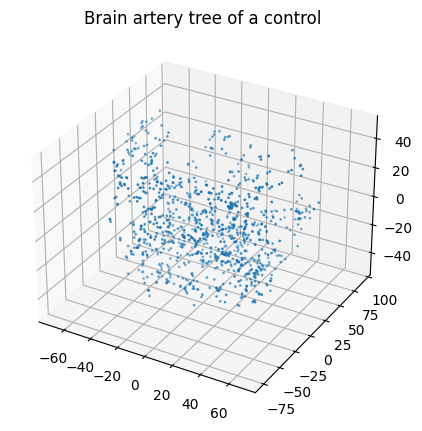

In [ ]:
fig = plt.figure(figsize=(15,5))

# set up the axes for the first plot
coordinates_group0 = np.asarray(df_patient_sub013['coordinates'].iloc[0])
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.title.set_text('Brain artery tree of a control')
ax.scatter(coordinates_group0[:,0], coordinates_group0[:,1], coordinates_group0[:,2], 'ko', s=1)

Calculating the Persistence Diagrams 

In [ ]:
pip install -U giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gtda.plotting  import plot_point_cloud, plot_diagram
from gtda.diagrams import NumberOfPoints
from gtda.pipeline import Pipeline
from gtda.diagrams import Amplitude


In [ ]:
subsampled_point_cloud = df_patient_sub013['coordinates'].to_list()
X_array = np.array(subsampled_point_cloud)

In [ ]:
X_array.shape

(1, 1000, 3)

1 is the number of subject (or point clouds), 10000 is the number of points in each point cloud, and 3 is the dimension pf the point cloud.

In [ ]:
from gtda.homology import VietorisRipsPersistence
%time
homology_dimensions = [0,1]

persistence = VietorisRipsPersistence(
    metric="euclidean",
    homology_dimensions=homology_dimensions,
    n_jobs=6,
)
diagrams_basic = persistence.fit_transform(X_array)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.5 µs


In [ ]:
diagrams_basic[0]

array([[0.        , 0.04717351, 0.        ],
       [0.        , 0.04738257, 0.        ],
       [0.        , 0.04750432, 0.        ],
       ...,
       [5.88448095, 7.43113184, 1.        ],
       [5.71284485, 6.51931286, 1.        ],
       [5.09755611, 5.94741535, 1.        ]])

In [ ]:
# Example PH diagram
plot_diagram(diagrams_basic[0])